In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [2]:
# MAIN_GOAL: grouping buildings to possible see some unseen information about the data - WITH LESS FEATURES

In [3]:
df = pd.read_csv('../Data/cleaned_data/green_roofs3.csv')

df

,green_roof_area,building_area,ratio_green_area,construction_year,roof_height,ground_elev,digitized,borough,xcoord,ycoord,area_type
0,971,14057,0.07,1900,59,90,1,BK,-73.93491,40.67389,public
1,696,4463,0.16,1900,13,21,0,MN,-73.99982,40.73481,commercial
2,293,13217,0.02,1900,93,7,0,MN,-74.00906,40.72480,commercial
3,759,4311,0.18,1900,99,21,0,MN,-74.00836,40.71595,commercial
4,7204,35891,0.20,1990,206,10,1,BX,-73.91227,40.81906,commercial
...,...,...,...,...,...,...,...,...,...,...,...
705,1525,6414,0.24,1800,104,6,0,MN,-74.00968,40.72554,residential
706,343,2941,0.12,1990,118,42,1,MN,-73.99311,40.72600,public
707,309,4350,0.07,1990,175,18,1,MN,-74.01044,40.71474,industrial
708,8139,20051,0.41,1960,23,12,0,MN,-73.93708,40.79703,commercial


In [4]:
df.describe()

,green_roof_area,building_area,ratio_green_area,construction_year,roof_height,ground_elev,digitized,xcoord,ycoord
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,2515.178873,21041.776056,0.173028,1942.802817,137.904225,40.660563,0.201408,-73.966258,40.745384
std,3665.914314,27257.680419,0.164256,43.075071,130.209084,31.682424,0.401335,0.045733,0.052617
min,10.000000,522.000000,0.000000,1800.000000,8.000000,-4.000000,0.000000,-74.077320,40.572220
25%,422.500000,4269.750000,0.060000,1900.000000,51.000000,15.000000,0.000000,-73.996050,40.717375
50%,1124.000000,11731.000000,0.120000,1930.000000,85.000000,32.000000,0.000000,-73.978575,40.741330
75%,2840.750000,26406.750000,0.220000,1990.000000,183.000000,61.000000,0.000000,-73.950807,40.773702
max,28669.000000,178941.000000,0.830000,1990.000000,755.000000,157.000000,1.000000,-73.751320,40.894420


In [5]:
df.columns

Index(['green_roof_area', 'building_area', 'ratio_green_area',
       'construction_year', 'roof_height', 'ground_elev', 'digitized',
       'borough', 'xcoord', 'ycoord', 'area_type'],
      dtype='object')

In [6]:
# to have the same display like in the last models
#this time we will encode the categoricals with one hot encoder
#this time we will reduce the features

df = df[['building_area', 'roof_height','borough','construction_year','area_type', 'green_roof_area' ]]

df

,building_area,roof_height,borough,construction_year,area_type,green_roof_area
0,14057,59,BK,1900,public,971
1,4463,13,MN,1900,commercial,696
2,13217,93,MN,1900,commercial,293
3,4311,99,MN,1900,commercial,759
4,35891,206,BX,1990,commercial,7204
...,...,...,...,...,...,...
705,6414,104,MN,1800,residential,1525
706,2941,118,MN,1990,public,343
707,4350,175,MN,1990,industrial,309
708,20051,23,MN,1960,commercial,8139


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   building_area      710 non-null    int64 
 1   roof_height        710 non-null    int64 
 2   borough            710 non-null    object
 3   construction_year  710 non-null    int64 
 4   area_type          710 non-null    object
 5   green_roof_area    710 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 33.4+ KB


In [8]:
# we want that the construction_year be categorical

df['construction_year'] = df['construction_year'].apply(str)


C:\Users\Admin\AppData\Local\Temp\ipykernel_18740\3121351444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['construction_year'] = df['construction_year'].apply(str)


In [9]:
#TRANSFORMING NUMERICALS

num = df.select_dtypes([np.number])
num

transformer = StandardScaler()
transformer.fit(num)
num_scaled_1 = transformer.transform(num)
num_scaled = pd.DataFrame(num_scaled_1, columns = num.columns)
num_scaled


,building_area,roof_height,green_roof_area
0,-0.256430,-0.606408,-0.421523
1,-0.608653,-0.959935,-0.496591
2,-0.287269,-0.345106,-0.606600
3,-0.614233,-0.298993,-0.479394
4,0.545156,0.523341,1.279934
...,...,...,...
705,-0.537026,-0.260567,-0.270295
706,-0.664530,-0.152971,-0.592952
707,-0.612801,0.285095,-0.602233
708,-0.036374,-0.883081,1.535166


In [10]:
#TRANSFORMING CATEGORICALS

cat = df.select_dtypes(['object'])
cat

encoder = OneHotEncoder()
cat_enc_1 = encoder.fit_transform(cat).toarray()
cat_enc = pd.DataFrame(cat_enc_1, columns = encoder.get_feature_names_out())
cat_enc


,borough_BK,borough_BX,borough_MN,borough_QN,borough_SI,construction_year_1800,construction_year_1850,construction_year_1900,construction_year_1930,construction_year_1960,construction_year_1990,area_type_commercial,area_type_industrial,area_type_public,area_type_residential
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
706,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
707,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
708,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [11]:
df_treated = pd.concat([num_scaled, cat_enc], axis = 1)
df_treated

,building_area,roof_height,green_roof_area,borough_BK,borough_BX,borough_MN,borough_QN,borough_SI,construction_year_1800,construction_year_1850,construction_year_1900,construction_year_1930,construction_year_1960,construction_year_1990,area_type_commercial,area_type_industrial,area_type_public,area_type_residential
0,-0.256430,-0.606408,-0.421523,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.608653,-0.959935,-0.496591,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.287269,-0.345106,-0.606600,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.614233,-0.298993,-0.479394,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.545156,0.523341,1.279934,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,-0.537026,-0.260567,-0.270295,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
706,-0.664530,-0.152971,-0.592952,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
707,-0.612801,0.285095,-0.602233,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
708,-0.036374,-0.883081,1.535166,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [12]:
df_treated.isna().sum() # concat went well

building_area             0
roof_height               0
green_roof_area           0
borough_BK                0
borough_BX                0
borough_MN                0
borough_QN                0
borough_SI                0
construction_year_1800    0
construction_year_1850    0
construction_year_1900    0
construction_year_1930    0
construction_year_1960    0
construction_year_1990    0
area_type_commercial      0
area_type_industrial      0
area_type_public          0
area_type_residential     0
dtype: int64

In [13]:
# checking the best  k

K = range(2,12)

inertia = []
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state = 19, verbose = 1)
    kmeans.fit(df_treated)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_treated, kmeans.predict(df_treated)))



C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 4681.3929141865865.
Iteration 1, inertia 2715.5343998420617.
Iteration 2, inertia 2671.6331343842044.
Iteration 3, inertia 2659.2789529930337.
Iteration 4, inertia 2655.221881595953.
Iteration 5, inertia 2653.420947532828.
Iteration 6, inertia 2651.9572473911862.
Iteration 7, inertia 2651.2132887892244.
Iteration 8, inertia 2650.9878261278877.
Iteration 9, inertia 2650.8748357550066.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 4335.1566291709605.
Iteration 1, inertia 3046.436413116306.
Iteration 2, inertia 2789.880874021016.
Iteration 3, inertia 2704.3695912191106.
Iteration 4, inertia 2669.026233012508.
Iteration 5, inertia 2657.4940605416123.
Iteration 6, inertia 2654.5556138903826.
Iteration 7, inertia 2652.7636117744914.
Iteration 8, inertia 2651.81454889853.
Iteration 9, inertia 2651.138476148936.
Iteration 10, inertia 2650.9878261278877.
Iteration 11, inertia 2650.8748357550066.
Converged 

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 4261.264238332188.
Iteration 1, inertia 2324.583962778953.
Iteration 2, inertia 2266.66255483803.
Iteration 3, inertia 2261.3082502515954.
Iteration 4, inertia 2260.7852522187445.
Iteration 5, inertia 2260.592658051192.
Iteration 6, inertia 2260.4554885976595.
Iteration 7, inertia 2260.2715993081224.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 3663.159698190655.
Iteration 1, inertia 2429.890990529792.
Iteration 2, inertia 2310.5993107525537.
Iteration 3, inertia 2264.145818731854.
Iteration 4, inertia 2258.665940756831.
Iteration 5, inertia 2258.0287637186607.
Iteration 6, inertia 2257.630715844758.
Iteration 7, inertia 2257.271687255514.
Iteration 8, inertia 2256.9044845148.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 3437.221839129244.
Iteration 1, inertia 2471.9314199035916.
Iteration 2, inertia 2433.4514152704323.
Iteration 3, inertia 2420.10300

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 8, inertia 2110.318588474108.
Iteration 9, inertia 2105.2879035664528.
Iteration 10, inertia 2098.7558140492115.
Iteration 11, inertia 2095.0215885117423.
Iteration 12, inertia 2094.064798762497.
Iteration 13, inertia 2093.3446570912342.
Iteration 14, inertia 2092.0654724210226.
Iteration 15, inertia 2088.8586423023594.
Iteration 16, inertia 2087.6149887532465.
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 3024.6419239597194.
Iteration 1, inertia 2218.6451405855855.
Iteration 2, inertia 2160.444442318075.
Iteration 3, inertia 2128.0999018194225.
Iteration 4, inertia 2116.911992764755.
Iteration 5, inertia 2112.1085883797286.
Iteration 6, inertia 2109.884719730297.
Iteration 7, inertia 2106.9349011757913.
Iteration 8, inertia 2104.006344599861.
Iteration 9, inertia 2101.739117793171.
Iteration 10, inertia 2098.8859946722796.
Iteration 11, inertia 2095.8082791579855.
Iteration 12, inertia 2091.6071554446808.
Iteration 13, inertia 20

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 4, inertia 1972.6694683127294.
Iteration 5, inertia 1961.3716984191958.
Iteration 6, inertia 1954.8042603099198.
Iteration 7, inertia 1945.0680919595045.
Iteration 8, inertia 1942.656135764592.
Iteration 9, inertia 1942.3867147679093.
Iteration 10, inertia 1942.340627718346.
Iteration 11, inertia 1942.2736539957898.
Iteration 12, inertia 1942.2405129830831.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 3123.00922708134.
Iteration 1, inertia 2214.457728521384.
Iteration 2, inertia 2024.0437551611012.
Iteration 3, inertia 1989.6710824915492.
Iteration 4, inertia 1972.5408486219546.
Iteration 5, inertia 1958.3174942086011.
Iteration 6, inertia 1951.5068362291427.
Iteration 7, inertia 1950.5438713146987.
Iteration 8, inertia 1950.1034729686062.
Iteration 9, inertia 1949.4231910664103.
Iteration 10, inertia 1949.1658889401197.
Iteration 11, inertia 1948.4788059117168.
Iteration 12, inertia 1948.28036514668.
Converged at iteration 12: s

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 12, inertia 1822.4008154749138.
Iteration 13, inertia 1821.0802438331639.
Iteration 14, inertia 1820.2703825137223.
Iteration 15, inertia 1819.84995376325.
Iteration 16, inertia 1819.6866408351727.
Iteration 17, inertia 1819.5997753949966.
Iteration 18, inertia 1819.5388464381288.
Iteration 19, inertia 1819.3567834815833.
Iteration 20, inertia 1819.3323577404585.
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 2688.5145155862397.
Iteration 1, inertia 2026.5764765177514.
Iteration 2, inertia 1882.1165136233612.
Iteration 3, inertia 1832.3994585765636.
Iteration 4, inertia 1812.591606929876.
Iteration 5, inertia 1804.3084129584518.
Iteration 6, inertia 1796.9544120676956.
Iteration 7, inertia 1785.0929477136349.
Iteration 8, inertia 1773.8009544365168.
Iteration 9, inertia 1770.0153123901857.
Iteration 10, inertia 1769.8386277396282.
Iteration 11, inertia 1769.7786507212297.
Iteration 12, inertia 1769.7104300661242.
Iteration 13, iner

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 13, inertia 1672.5250764433258.
Iteration 14, inertia 1672.4166372120612.
Iteration 15, inertia 1672.3671973477449.
Iteration 16, inertia 1672.278909215024.
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 2477.8623735466776.
Iteration 1, inertia 1829.278255805069.
Iteration 2, inertia 1780.822007615267.
Iteration 3, inertia 1768.180200267403.
Iteration 4, inertia 1763.4074637048384.
Iteration 5, inertia 1757.6678747357246.
Iteration 6, inertia 1748.1772133192671.
Iteration 7, inertia 1739.8441317170698.
Iteration 8, inertia 1733.443561885659.
Iteration 9, inertia 1729.2023851929707.
Iteration 10, inertia 1725.340465694785.
Iteration 11, inertia 1723.8410446836838.
Iteration 12, inertia 1723.633483532778.
Iteration 13, inertia 1723.5116960233863.
Iteration 14, inertia 1723.194953098017.
Iteration 15, inertia 1722.551672673218.
Iteration 16, inertia 1722.240727879316.
Converged at iteration 16: strict convergence.
Initialization compl

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 15, inertia 1577.1131782857365.
Iteration 16, inertia 1577.0570798109195.
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 2332.730950292007.
Iteration 1, inertia 1703.1178870284311.
Iteration 2, inertia 1643.4469118806865.
Iteration 3, inertia 1604.6401142756554.
Iteration 4, inertia 1598.8083811884308.
Iteration 5, inertia 1597.8981579653178.
Iteration 6, inertia 1596.993795572393.
Iteration 7, inertia 1596.2727099778547.
Iteration 8, inertia 1595.6111607244247.
Iteration 9, inertia 1595.167618197517.
Iteration 10, inertia 1595.0734782366171.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 2475.799279968434.
Iteration 1, inertia 1725.8499628614186.
Iteration 2, inertia 1659.2593958319133.
Iteration 3, inertia 1634.5188245844654.
Iteration 4, inertia 1627.7479528843046.
Iteration 5, inertia 1622.8683216112302.
Iteration 6, inertia 1617.3205232620012.
Iteration 7, inertia 1610.0791776399333

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 15, inertia 1508.5816629792523.
Iteration 16, inertia 1507.8201736528245.
Iteration 17, inertia 1506.9569587830192.
Iteration 18, inertia 1504.2630773529036.
Iteration 19, inertia 1501.346859542812.
Iteration 20, inertia 1500.6198860143359.
Iteration 21, inertia 1500.334511182698.
Iteration 22, inertia 1499.9800294131196.
Converged at iteration 22: strict convergence.
Initialization complete
Iteration 0, inertia 2332.9155452394943.
Iteration 1, inertia 1666.523857702103.
Iteration 2, inertia 1584.4548978513671.
Iteration 3, inertia 1556.0762551463868.
Iteration 4, inertia 1547.2999832610562.
Iteration 5, inertia 1543.406019164032.
Iteration 6, inertia 1542.1405442341675.
Iteration 7, inertia 1541.5320789392779.
Iteration 8, inertia 1541.1640120783945.
Iteration 9, inertia 1540.7204705824615.
Iteration 10, inertia 1540.4239571334645.
Iteration 11, inertia 1540.1225684822284.
Iteration 12, inertia 1538.680025307402.
Iteration 13, inertia 1535.1448539752873.
Iteration 14, inerti

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 3, inertia 1476.506520034508.
Iteration 4, inertia 1459.9985408743685.
Iteration 5, inertia 1453.3450401809387.
Iteration 6, inertia 1429.773308081259.
Iteration 7, inertia 1422.790800640189.
Iteration 8, inertia 1420.9757839438505.
Iteration 9, inertia 1418.2105744827668.
Iteration 10, inertia 1416.234483869975.
Iteration 11, inertia 1415.4707898325414.
Iteration 12, inertia 1414.7543813619782.
Iteration 13, inertia 1414.6937866040053.
Iteration 14, inertia 1414.5620626808816.
Iteration 15, inertia 1414.4549362281975.
Iteration 16, inertia 1414.4157416714897.
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 2178.856820595803.
Iteration 1, inertia 1624.3227835156504.
Iteration 2, inertia 1529.8594514895503.
Iteration 3, inertia 1499.075675124114.
Iteration 4, inertia 1469.267386921661.
Iteration 5, inertia 1456.5512896768312.
Iteration 6, inertia 1452.8501827794305.
Iteration 7, inertia 1451.6607602909467.
Iteration 8, inertia 1448.6

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 15, inertia 1380.7475176679543.
Iteration 16, inertia 1380.5813719725577.
Iteration 17, inertia 1380.4790258146559.
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 2173.008091261105.
Iteration 1, inertia 1548.6344839214637.
Iteration 2, inertia 1487.8872107586906.
Iteration 3, inertia 1454.1279301073457.
Iteration 4, inertia 1440.5412195660363.
Iteration 5, inertia 1433.3801176015345.
Iteration 6, inertia 1423.7593490392396.
Iteration 7, inertia 1418.4604379597783.
Iteration 8, inertia 1417.0556046924744.
Iteration 9, inertia 1416.2369777590204.
Iteration 10, inertia 1416.0138482121167.
Iteration 11, inertia 1415.9765080593795.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 2058.1369475654315.
Iteration 1, inertia 1502.0292919657286.
Iteration 2, inertia 1441.5308893661424.
Iteration 3, inertia 1419.8701365049676.
Iteration 4, inertia 1404.158116540313.
Iteration 5, inertia 1395.615825276

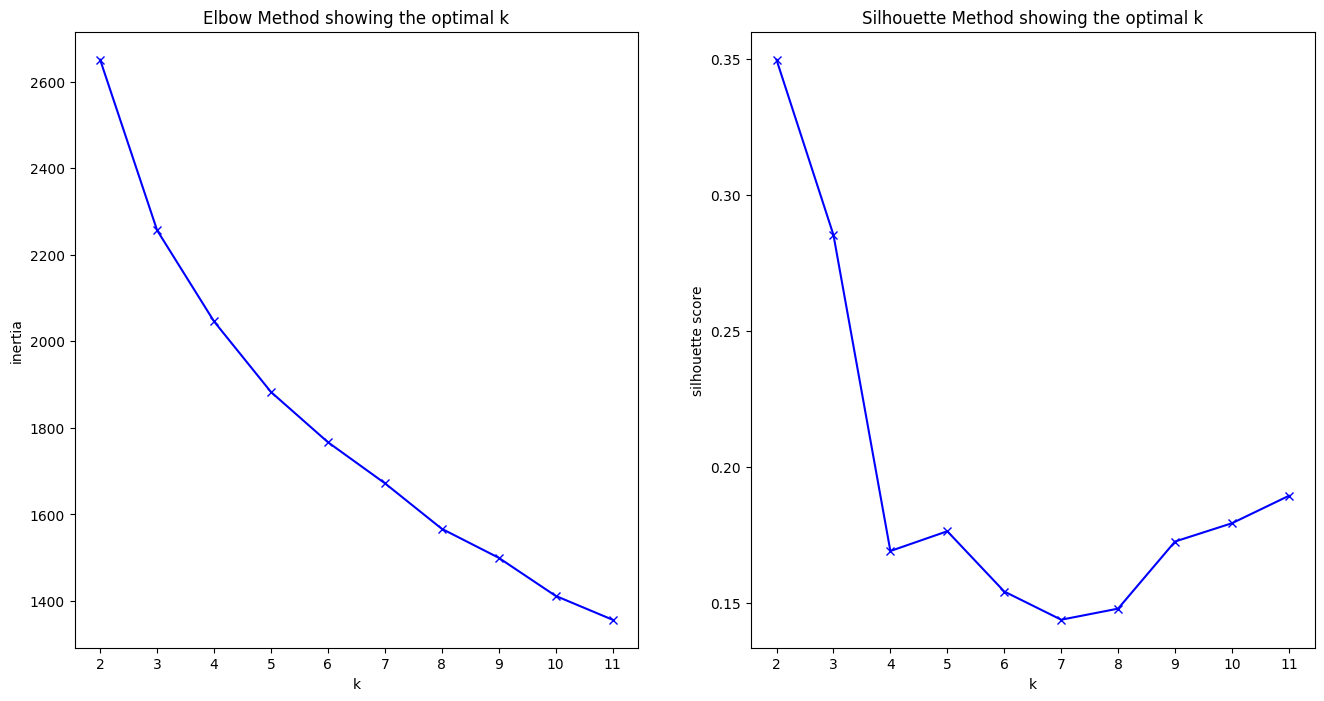

In [14]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')
plt.show()



In [15]:
number_of_clusters = list(np.arange(2,12))
number_of_clusters
silhouette

df_silhouete_number_of_clusters = pd.DataFrame(silhouette,number_of_clusters, columns=['nr_of_clusters[K]''silhouette'])
df_silhouete_number_of_clusters

,nr_of_clusters[K]silhouette
2,0.349619
3,0.285202
4,0.168948
5,0.176221
6,0.154058
7,0.143683
8,0.147759
9,0.172444
10,0.179169
11,0.189255


In [16]:
# the best k is 5

In [17]:
#Clustering

kmeans_5 = KMeans(n_clusters = 5, random_state = 19)
kmeans_5.fit(df_treated)

clusters5 = kmeans_5.predict(df_treated)
pd.Series(clusters5).value_counts().sort_index()


C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    215
1    120
2     28
3    317
4     30
dtype: int64

In [18]:
df['clusters_5'] = clusters5
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_18740\3746491915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters_5'] = clusters5


,building_area,roof_height,borough,construction_year,area_type,green_roof_area,clusters_5
0,14057,59,BK,1900,public,971,0
1,4463,13,MN,1900,commercial,696,3
2,13217,93,MN,1900,commercial,293,3
3,4311,99,MN,1900,commercial,759,3
4,35891,206,BX,1990,commercial,7204,1
...,...,...,...,...,...,...,...
705,6414,104,MN,1800,residential,1525,3
706,2941,118,MN,1990,public,343,3
707,4350,175,MN,1990,industrial,309,3
708,20051,23,MN,1960,commercial,8139,3


In [19]:
# checking some patterns in the clusters

df[df['clusters_5']==0].sample(5)



,building_area,roof_height,borough,construction_year,area_type,green_roof_area,clusters_5
328,12132,119,BK,1990,residential,527,0
592,18022,152,BK,1990,residential,864,0
160,2538,47,BX,1900,residential,1313,0
198,26427,67,QN,1930,residential,6197,0
18,22367,48,BK,1990,residential,931,0


In [20]:
df[df['clusters_5']==1].sample(5)

,building_area,roof_height,borough,construction_year,area_type,green_roof_area,clusters_5
541,72811,295,MN,1960,residential,4135,1
414,6389,378,MN,1960,residential,489,1
679,43540,217,MN,1990,commercial,4803,1
190,33931,289,MN,1960,commercial,422,1
238,22095,605,MN,1990,commercial,699,1


In [21]:
df[df['clusters_5']==2].sample(5)

,building_area,roof_height,borough,construction_year,area_type,green_roof_area,clusters_5
484,100293,28,MN,1960,commercial,11006,2
395,112685,35,BX,1960,residential,10032,2
427,100651,46,QN,1930,residential,11895,2
482,140402,60,SI,1930,residential,8971,2
268,71917,92,MN,1960,commercial,5484,2


In [22]:
df[df['clusters_5']==3].sample(5)

,building_area,roof_height,borough,construction_year,area_type,green_roof_area,clusters_5
6,5813,118,MN,1900,commercial,147,3
621,20328,74,MN,1990,commercial,3146,3
43,15623,203,MN,1900,industrial,603,3
2,13217,93,MN,1900,commercial,293,3
212,6098,92,MN,1900,industrial,662,3


In [23]:
df[df['clusters_5']==4].sample(5)

,building_area,roof_height,borough,construction_year,area_type,green_roof_area,clusters_5
396,32302,35,BK,1990,residential,15430,4
501,28015,226,MN,1990,residential,10113,4
248,28805,83,MN,1960,residential,9409,4
597,70910,35,QN,1960,commercial,10351,4
323,62229,155,MN,1990,industrial,13361,4


In [24]:
clusters3_df = df
clusters3_df.to_csv('../Data/cleaned_data/clusters3_df.csv', index = False)

In [25]:
#CONCLUSION: from here we can't notice any pattern

#NEXT_STEPS:
            # Explore this new clusters data frames to find some patterns
            # Do another clustering usind DBSCAN